In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pytorch_lightning as pl
from model import CorrectionModel
from dataset import create_train_test_dataloaders
import optuna
import pickle
sns.set()


# Training data overview

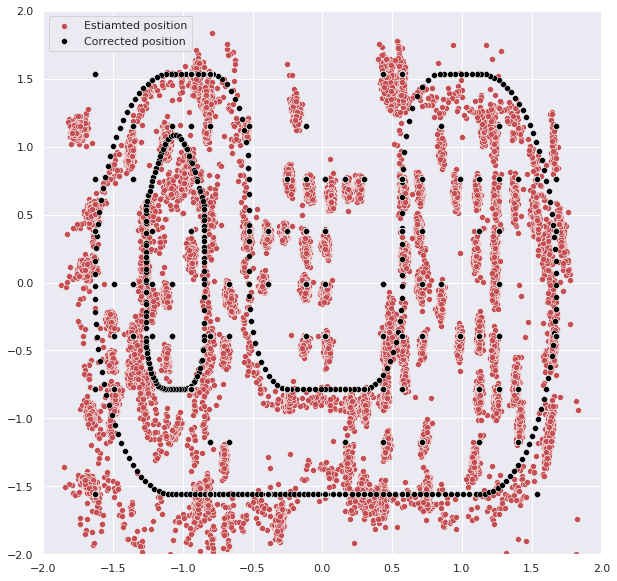

In [33]:
X_test = torch.load("tensor_dataset.pt")[:20_000]

plt.figure(figsize=(10,10))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], color='r', label="Estiamted position")
sns.scatterplot(x=X_test[:, 2][::5], y=X_test[:, 3][::5], color='black', label="Corrected position");
plt.xlim([-2, 2])
plt.ylim([-2, 2]);

# Visualizing hyperparemeter search

In [16]:
with open("study.pkl", "rb") as f:
    study = pickle.load(f)

In [17]:
study.best_params

{'number_of_layers': 5,
 'layer_0_width': 617,
 'layer_1_width': 849,
 'layer_2_width': 507,
 'layer_3_width': 677,
 'layer_4_width': 269,
 'dropout': 0.2173540960528459,
 'activ_type': 'LeakyReLU',
 'loss_fn': 'mse',
 'lr': 0.0007582178544586509,
 'alpha': 0.8135146678714309}

In [18]:
optuna.visualization.plot_contour(study, ["layer_0_width", "lr"])

In [19]:
optuna.visualization.plot_param_importances(study)

# Testing best model

In [20]:
model = CorrectionModel(conf=study.best_trial.params)

trainer = pl.Trainer(
    val_check_interval=0.33,
    max_epochs=4,
    gpus=1,
    auto_lr_find=True,
)

train_dataloader, test_dataloader = create_train_test_dataloaders(fake=True)

trainer.fit(model, train_dataloader, test_dataloader)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
100%|██████████| 233/233 [00:19<00:00, 11.74it/s]
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Appended 51171 rows in total.
	After deleting NaNs: 51164.
Standardizing dataset:
Loaded test dataset. MAE(X, Y) = 0.10943232861393139



  | Name           | Type       | Params
----------------------------------------------
0 | neural_network | Sequential | 1.5 M 
----------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
5.940     Total estimated model params size (MB)


0.0007582178544586509
Adjusting learning rate of group 0 to 7.5822e-04.


/home/maciej/.local/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning:

The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.



Validation sanity check: 0it [00:00, ?it/s]

/home/maciej/.local/lib/python3.9/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning:

The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.



Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 4.3142e-04.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 2.4548e-04.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 1.3967e-04.


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Adjusting learning rate of group 0 to 7.9474e-05.


1

In [22]:
pred_corrections = model.forward(X_test[:, [0, 1]].float()).detach()
predictions = X_test[:, [0, 1]] + pred_corrections

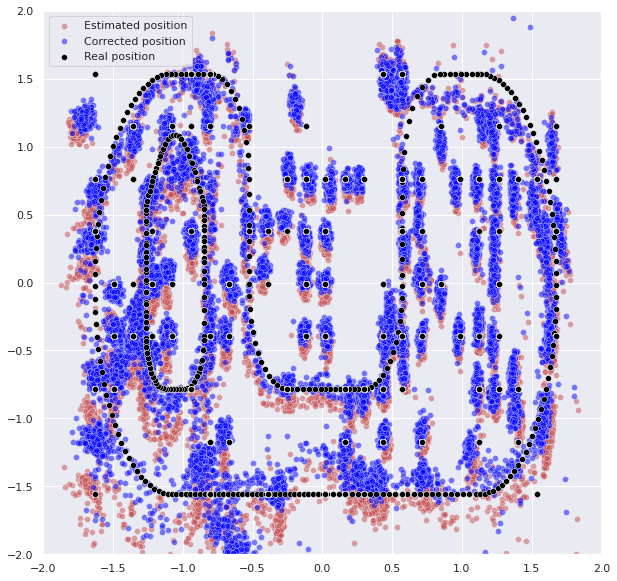

In [38]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], color='r', alpha=0.5, label="Estimated position")
sns.scatterplot(x=predictions[:, 0], y=predictions[:, 1], color='blue', alpha=0.5, label="Corrected position")

sns.scatterplot(x=X_test[:, 2][::5], y=X_test[:, 3][::5], color='black', label="Real position");

plt.xlim([-2, 2])
plt.ylim([-2, 2]);

# In depth

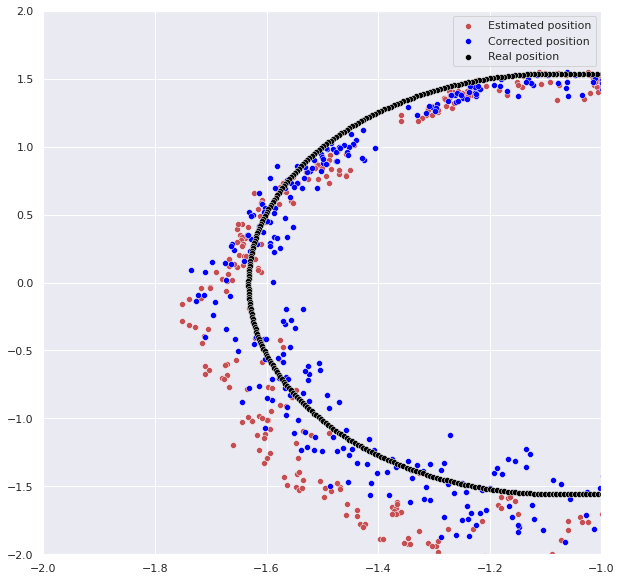

In [44]:
plt.figure(figsize=(10,10))

n=2_000
sns.scatterplot(x=X_test[:n, 0], y=X_test[:n, 1], color='r', label="Estimated position")
sns.scatterplot(x=predictions[:n, 0], y=predictions[:n, 1], color='blue', label="Corrected position")

sns.scatterplot(x=X_test[:n, 2], y=X_test[:n, 3], color='black', label="Real position");

plt.xlim([-2, -1])
plt.ylim([-2, 2]);